# Predicting NBA All-Star Chance Based on Player Performance

By: Bill Makwae, Ayush Vora, Ray Nguyen, QingRu Kong

## Introduction

Every year in February, NBA fans rejoice as they get to see their favorite players selected for the all-star game. Players are selected by media and fan votes, meaning that popularity is the nominating factor. However, players are more likely to be popular based on their individual game-to-game performance. Thus, this analysis hopes to answer the question: **Can an NBA player’s selection to the all star game be predicted by their annual performance?**

In order to answer this question, we will be using two sets of data, one from ["NBA Player Stats” on nba.com](https://www.nba.com/stats/players/traditional/?sort=PTS&dir=-1&Season=2015-16&SeasonType=Regular%20Season) and [“NBA All Stars 2000-2016” from kaggle.com](https://www.kaggle.com/fmejia21/nba-all-star-game-20002016?select=NBA+All+Stars+2000-2016+-+Sheet1.csv). NBA Player Stats includes all the NBA player statistics for each season from 2010-2016 and the All Star dataset includes the all star statistics from 2000-2016. Using these datasets we aim to make a classification model that will predict whether a player will be an all star for each season based on their annual performances.

The variables that we will be looking at for this data set are the following:
- Year: Season that the player played.
- Player: Name of the player.
- MIN: Average number of minutes that the player played per game.
- PTS: Average number of points that the player scored per game.
- FG.: Field Goal Percentage.
- REB: Average number of rebounds that the player made per game.
- AST: Average number of assists that the player got per game.
- Is_All_Star: Whether the player was an All-Star in that season.

We chose these variables because they are the most indicative of a player's offensive output, which is the main focus of the all star game.

## Preliminary Exploratory Data Analysis

In [1]:
## RUN THIS FIRST TO LOAD LIBRARIES

library(tidyverse)
library(repr)
library(readxl)
library(dplyr)
library(GGally)
library(tidymodels)
set.seed(2022)
install.packages("themis")
library(themis)



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0     ✔ recipes   0.2.0
✔ dials     0.0.9     ✔ rsample   0.0.7
✔ infer     0.5.4     ✔ tune

In [2]:
## Data set #1: NBA Player Stats
## Filtered from years 2011-2015

players <- read.csv("https://raw.githubusercontent.com/RayNguyent/DSCI-100-project/urls/data/nba_player_stats.csv")
head(players)


,Year,Player,GP,MIN,PTS,FGM,FGA,FG.,X3PM,X3PA,⋯,FTM,FTA,FT.,OREB,DREB,REB,AST,STL,BLK,TOV
,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2011,Kevin Durant,78,38.9,27.7,9.1,19.7,46.2,1.9,5.3,⋯,7.6,8.7,88.0,0.7,6.1,6.8,2.7,1.1,1.0,2.8
2,2011,LeBron James,79,38.8,26.7,9.6,18.8,51.0,1.2,3.5,⋯,6.4,8.4,75.9,1.0,6.5,7.5,7.0,1.6,0.6,3.6
3,2011,Carmelo Anthony,77,35.7,25.6,8.9,19.5,45.5,1.2,3.3,⋯,6.6,7.9,83.8,1.5,5.8,7.3,2.9,0.9,0.6,2.7
4,2011,Dwyane Wade,76,37.1,25.5,9.1,18.2,50.0,0.8,2.7,⋯,6.5,8.6,75.8,1.6,4.8,6.4,4.6,1.5,1.1,3.1
5,2011,Kobe Bryant,82,33.9,25.3,9.0,20.0,45.1,1.4,4.3,⋯,5.9,7.1,82.8,1.0,4.1,5.1,4.7,1.2,0.1,3.0
6,2011,Amar'e Stoudemire,78,36.8,25.3,9.5,19.0,50.2,0.1,0.3,⋯,6.1,7.7,79.2,2.5,5.6,8.2,2.6,0.9,1.9,3.2


In [3]:
## Data set #2: NBA All Stars 2000-2016
## Filtered from years 2011-2015

all_stars <- read_csv("https://raw.githubusercontent.com/RayNguyent/DSCI-100-project/develop/data/all_stars_2000_2016.csv")
all_stars_filtered <- all_stars %>% 
    filter(Year <= 2015 & Year >= 2011) %>% 
    select(Year, Player) %>% 
    mutate(Is_All_Star = "All Star")
head(all_stars_filtered)

Parsed with column specification:
cols(
  Year = col_double(),
  Player = col_character(),
  Pos = col_character(),
  HT = col_character(),
  WT = col_double(),
  Team = col_character(),
  `Selection Type` = col_character(),
  `NBA Draft Status` = col_character(),
  Nationality = col_character()
)



Year,Player,Is_All_Star
<dbl>,<chr>,<chr>
2015,LeBron James,All Star
2015,Dwyane Wade,All Star
2015,Paul George,All Star
2015,Carmelo Anthony,All Star
2015,Kyle Lowry,All Star
2015,Jimmy Butler,All Star


In [4]:

## Combined data sets

combined_data <- left_join(players, all_stars_filtered, by = c("Year", "Player")) %>% 
    replace(is.na(.), "Regular") %>% 
    mutate(Is_All_Star = as_factor(Is_All_Star))

head(combined_data)

,Year,Player,GP,MIN,PTS,FGM,FGA,FG.,X3PM,X3PA,⋯,FTA,FT.,OREB,DREB,REB,AST,STL,BLK,TOV,Is_All_Star
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,2011,Kevin Durant,78,38.9,27.7,9.1,19.7,46.2,1.9,5.3,⋯,8.7,88.0,0.7,6.1,6.8,2.7,1.1,1.0,2.8,All Star
2,2011,LeBron James,79,38.8,26.7,9.6,18.8,51.0,1.2,3.5,⋯,8.4,75.9,1.0,6.5,7.5,7.0,1.6,0.6,3.6,All Star
3,2011,Carmelo Anthony,77,35.7,25.6,8.9,19.5,45.5,1.2,3.3,⋯,7.9,83.8,1.5,5.8,7.3,2.9,0.9,0.6,2.7,All Star
4,2011,Dwyane Wade,76,37.1,25.5,9.1,18.2,50.0,0.8,2.7,⋯,8.6,75.8,1.6,4.8,6.4,4.6,1.5,1.1,3.1,All Star
5,2011,Kobe Bryant,82,33.9,25.3,9.0,20.0,45.1,1.4,4.3,⋯,7.1,82.8,1.0,4.1,5.1,4.7,1.2,0.1,3.0,All Star
6,2011,Amar'e Stoudemire,78,36.8,25.3,9.5,19.0,50.2,0.1,0.3,⋯,7.7,79.2,2.5,5.6,8.2,2.6,0.9,1.9,3.2,Regular


In [5]:
set.seed(2022)

## Select the potential attributes
selected_combined_data <- combined_data %>% 
    filter(Year <= 2015 & Year >= 2011) %>% 
    filter(Player != "0") %>%
    select(Year, Player, MIN, PTS, FGM, FGA, FTM, FTA, TOV, Is_All_Star)

data_split <- initial_split(selected_combined_data, prop = 0.7, strata = Is_All_Star)
data_training <- training(data_split)
data_testing <- testing(data_split)

head(data_training)

,Year,Player,MIN,PTS,FGM,FGA,FTM,FTA,TOV,Is_All_Star
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,2011,Kevin Durant,38.9,27.7,9.1,19.7,7.6,8.7,2.8,All Star
2,2011,LeBron James,38.8,26.7,9.6,18.8,6.4,8.4,3.6,All Star
4,2011,Dwyane Wade,37.1,25.5,9.1,18.2,6.5,8.6,3.1,All Star
5,2011,Kobe Bryant,33.9,25.3,9.0,20.0,5.9,7.1,3.0,All Star
6,2011,Amar'e Stoudemire,36.8,25.3,9.5,19.0,6.1,7.7,3.2,Regular
8,2011,Monta Ellis,40.3,24.1,9.1,20.1,4.3,5.4,3.2,Regular


In [6]:
averages <- group_by(data_training, Is_All_Star) %>% 
    summarize(across(MIN:TOV, mean))
averages
# figure out how to plot if we have time

proportion <- group_by(data_training, Is_All_Star) %>% 
    summarize(n = n()) %>% 
    mutate(percent = 100*n/nrow(data_training))

proportion

`summarise()` ungrouping output (override with `.groups` argument)



Is_All_Star,MIN,PTS,FGM,FGA,FTM,FTA,TOV
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
All Star,34.90658,20.41842,7.393421,15.478947,4.530263,5.723684,2.511842
Regular,25.48287,10.31891,3.906204,8.601329,1.745495,2.308715,1.402954


`summarise()` ungrouping output (override with `.groups` argument)



Is_All_Star,n,percent
<fct>,<int>,<dbl>
All Star,76,10.09296
Regular,677,89.90704


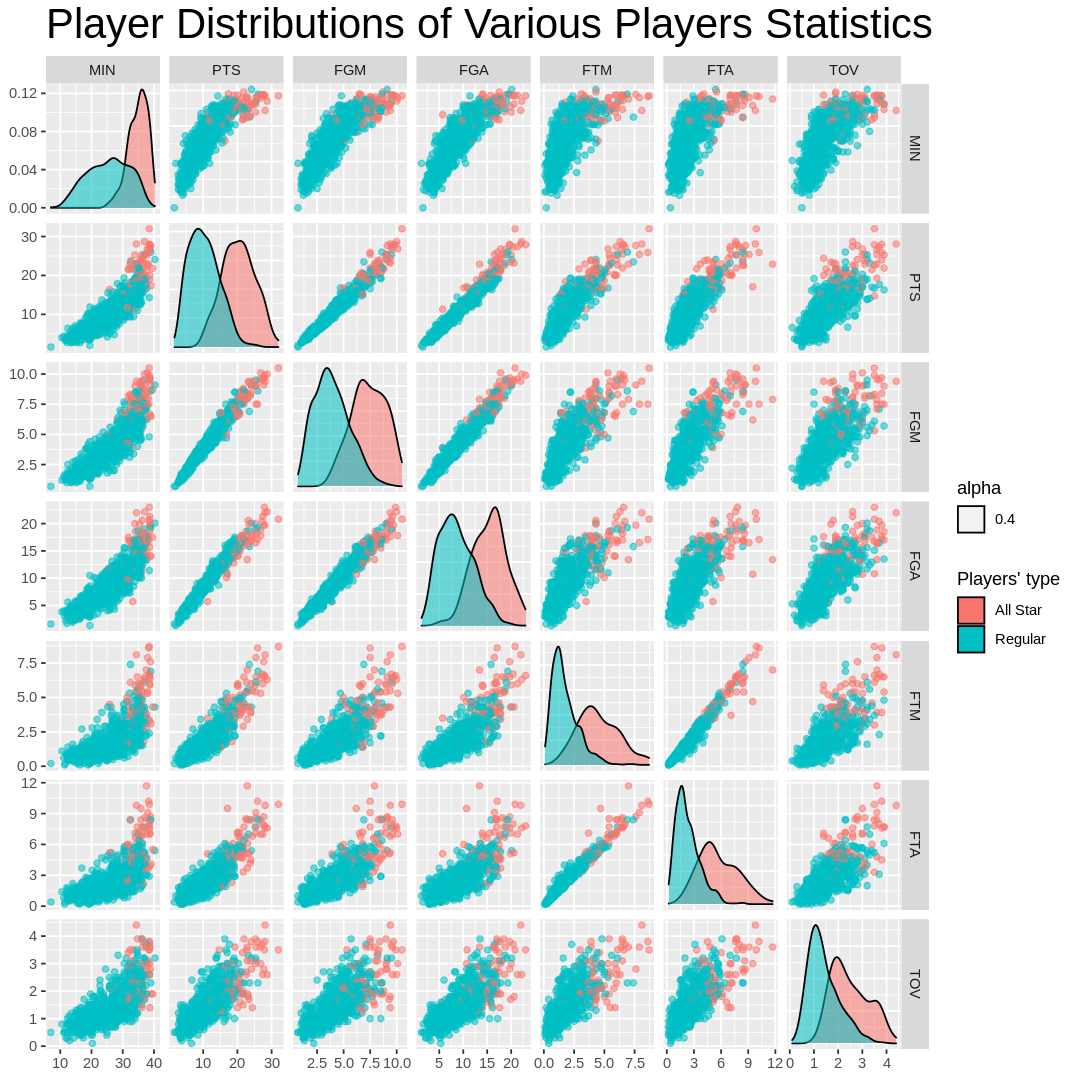

In [7]:
set.seed(2022)

## Graphs displaying relationships between each variable.
options(repr.plot.width = 9, repr.plot.height = 9) 
plot <- ggpairs(data_training, columns = 3:9, legend = 1,
                ggplot2::aes(color = Is_All_Star, alpha = 0.4),
                upper = list(continuous = "points", wrap("cor", size = 2.5))) +
                labs(title = "Player Distributions of Various Players Statistics", fill = "Players' type") +
                theme(plot.title = element_text(size = 25))
                
plot

## Methods

First, we got ready by importing libraries, setting the seed, reading and tidying the data, and separating the data into a training set and a testing set. We calculated the means of the different statistics grouped by their all-star status, and observed that the all-star players had higher statics all around. We also visualized out data to compare the different applicable variables. From this, we were able to tell from the distribution graphs of what variables truly separate the all-stars from the regular players. The biggest factors are the minutes played and the points scored.

We will find each player’s annual player stats (points, rebounds, assists, minutes per game, and field goal percentage) for each year and use these predictors in our classification model. We chose these variables because they are the most indicative of a player's offensive output, which is the main focus of the all star game.

We have decided to use both scatter plot and density graph as they can best visualize the distributions of various players statistics. The above graph displays the distribution of all star players compared to the regular players for each variable we have chosen. 

## Expected Outcomes and Significance

Since likely cast their votes based on the player's offensive performance, we expect all star players to have higher player stats (points, rebounds, assists, etc) which will make our classification model relatively accurate.

The impact of this information could improve people's sports betting methods, and help organisations determine player value when negotiating contracts. Many organisations give contracts with bonuses to all star players and this information could help them determine the amount of extra money to offer a player if they make the game. 

Further analysis of these stats could help answer questions like: What makes a good defensive player of the year canidate? What kind of players would be invited to join the Team USA Olympic Basketball team? Can a player's value to an organisation be assessed through their player stats? Can player stat information infer how large their contract should be?


In [11]:
set.seed(2022)

data_fold <- vfold_cv(data_training, v = 5, strata = Is_All_Star)

k_vals <- tibble(neighbors = seq(from = 1, to = 70, by = 5))

data_recipe <- recipe(Is_All_Star ~ MIN + PTS + FGM + FGA + FTM + FTA + TOV, data = data_training) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors()) %>% step_upsample(Is_All_Star, over_ratio =1, skip = TRUE)


data_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("classification")

data_fit <- workflow() %>%
    add_recipe(data_recipe) %>%
    add_model(data_spec) %>%
    tune_grid(resamples = data_fold, grid = k_vals) %>%
    collect_metrics() %>%
    filter(.metric == "accuracy")

data_fit

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.9163251,5,0.008046938,Model01
6,accuracy,binary,0.8792116,5,0.007410546,Model02
11,accuracy,binary,0.8526942,5,0.013170255,Model03
16,accuracy,binary,0.8247559,5,0.010394104,Model04
21,accuracy,binary,0.8234489,5,0.010498358,Model05
26,accuracy,binary,0.8194402,5,0.014637522,Model06
31,accuracy,binary,0.8061682,5,0.013118749,Model07
36,accuracy,binary,0.8234050,5,0.007255490,Model08
41,accuracy,binary,0.8287559,5,0.010059437,Model09


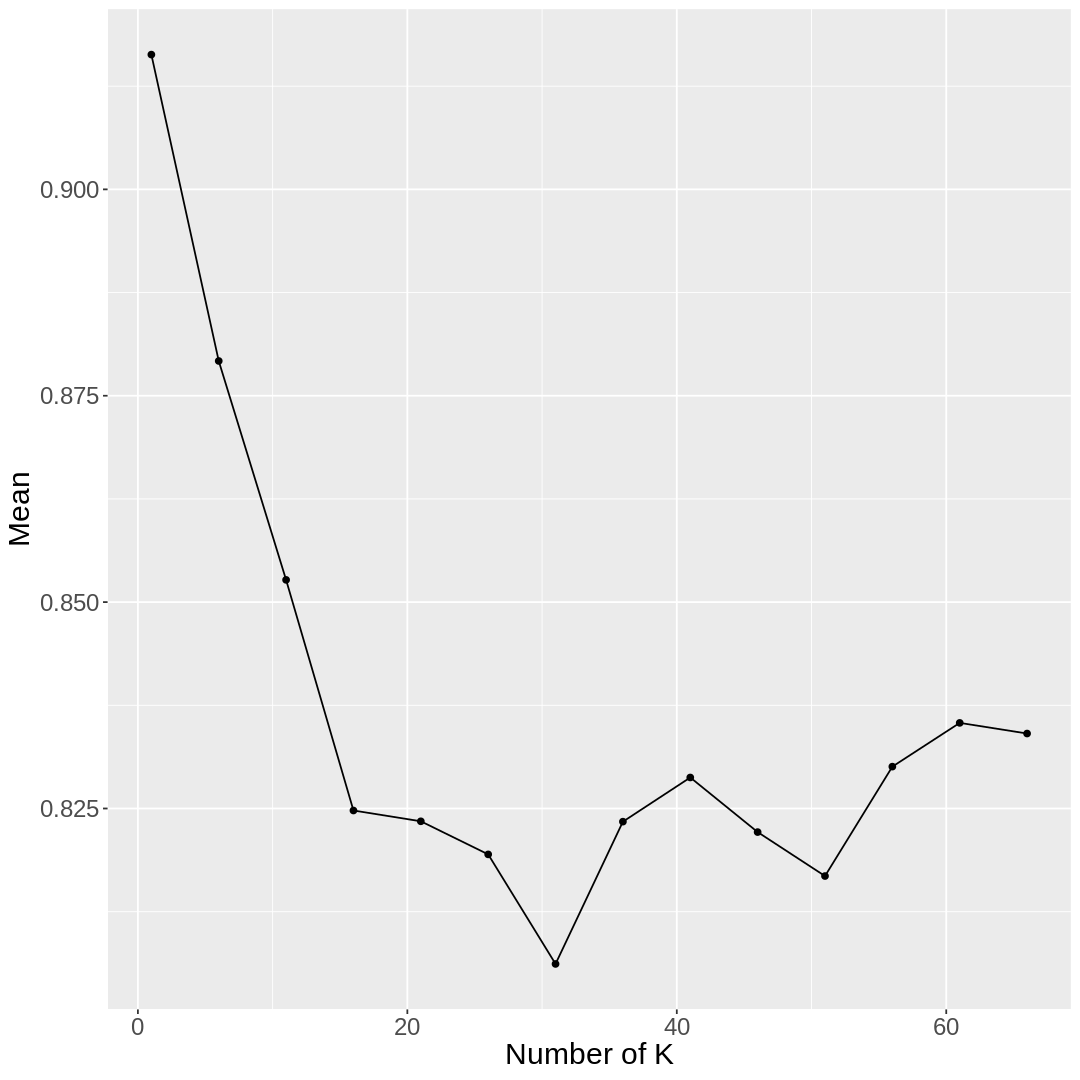

In [17]:
data_plot <- ggplot(data_fit, aes(x = neighbors, y = mean)) +
    geom_line() +
    geom_point() +
    xlab("Number of K") +
    ylab("Mean") + theme(text = element_text(size = 18))

data_plot

In [15]:
data_updated_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 61) %>%
    set_engine("kknn") %>%
    set_mode("classification")

data_updated_fit <- workflow() %>%
    add_recipe(data_recipe) %>%
    add_model(data_updated_spec) %>%
    fit(data_training)

data_prediction <- predict(data_updated_fit, data_testing) %>%
    bind_cols(data_testing)

head(data_prediction)

.pred_class,Year,Player,MIN,PTS,FGM,FGA,FTM,FTA,TOV,Is_All_Star
<fct>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
All Star,2011,Carmelo Anthony,35.7,25.6,8.9,19.5,6.6,7.9,2.7,All Star
All Star,2011,Derrick Rose,37.4,25.0,8.8,19.7,5.9,6.9,3.4,All Star
All Star,2011,Michael Beasley,32.3,19.2,7.7,17.1,3.0,4.0,2.7,Regular
All Star,2011,Al Jefferson,35.9,18.6,8.0,16.1,2.7,3.5,1.3,Regular
All Star,2011,Josh Smith,34.4,16.5,6.5,13.5,3.0,4.1,2.6,Regular
All Star,2011,Dorell Wright,38.4,16.4,5.9,14.0,2.2,2.8,1.6,Regular


In [16]:
data_metrics <- metrics(data_prediction, truth = Is_All_Star, estimate = .pred_class) %>%
    filter(.metric == "accuracy") %>%
    select(.estimate) %>%
    pull()

data_metrics

confusion <- conf_mat(data_prediction, truth = Is_All_Star, estimate = .pred_class)

confusion

[1] 0.8074534

          Truth
Prediction All Star Regular
  All Star       23      59
  Regular         3     237

In [ ]:
rare_plot <- data_testing %>%
  ggplot(aes(x = PTS, y = Concavity, color = Class)) +
  geom_point(alpha = 0.5) +
  labs(x = "Perimeter (standardized)", 
       y = "Concavity (standardized)",
       color = "Diagnosis") +
  scale_color_manual(labels = c("Malignant", "Benign"), 
                     values = c("orange2", "steelblue2")) +
  theme(text = element_text(size = 12))

## Discussion

summarize what you found
discuss whether this is what you expected to find?
discuss what impact could such findings have?
discuss what future questions could this lead to?

